#📌 Extracción

In [18]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

#🔧 Transformación

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


**Diccionario de datos**
*   customerID: número de identificación único de cada cliente
*   Churn: si el cliente dejó o no la empresa
gender: género (masculino y femenino)
*   SeniorCitizen: información sobre si un cliente tiene 65 años o más
*   Partner: si el cliente tiene pareja o no
*   Dependents: si el cliente tiene dependientes o no
*   tenure: meses de contrato del cliente
*   PhoneService: suscripción de servicio telefónico
*   MultipleLines: suscripción a más de una línea de teléfono
*   InternetService: suscripción a un proveedor de internet
*   OnlineSecurity: suscripción adicional de seguridad online
*   OnlineBackup: suscripción adicional de backup online
*   DeviceProtection: suscripción adicional de protección en el dispositivo
*   TechSupport: suscripción adicional de soporte técnico, menos tiempo de espera
*   StreamingTV: suscripción de TV por cable
*   StreamingMovies: suscripción de streaming de películas
*   Contract: tipo de contrato
*   PaperlessBilling: si el cliente prefiere recibir la factura online
*   PaymentMethod: forma de pago
*   Charges.Monthly: total de todos los servicios del cliente por mes
*   Charges.Total: total gastado por el cliente

#📊 Carga y análisis

In [4]:
from pandas import json_normalize

df_normalizado = json_normalize(data)

df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [5]:
df_normalizado.head(30)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


**Acciones más comunes**

*   Duplicados
*   Valores vacíos
*   Valores nulos
*   Tipos de datos
*   Valores atípicos
*   Consistencia y validez de datos categóricos
*   Normalización de textos

In [6]:
# Verifique si hay valores únicos en cada columna
for col in df_normalizado.columns:
  print(f"valores únicos en la columna'{col}': {df_normalizado[col].nunique()}")
  if df_normalizado[col].nunique() < 50: # Imprima los valores solamente si no hay muchos
    print(df_normalizado[col].unique())
    print('-' * 50)  # Línea divisoria para mejor visualización

valores únicos en la columna'customerID': 7267
valores únicos en la columna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.tenure': 73
valores únicos en la columna'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'internet.InternetService': 3
['DSL' 'Fiber optic' 'No'

In [7]:
# Verificando si hay duplicados
duplicados = df_normalizado.duplicated().sum()
print(f"Numero de lineas duplicadas: {duplicados}")

# Verificando se hay valores Nulos
valores_nulos = df_normalizado.isnull().values.sum()
print("\nValores nulos por columna:")
print(valores_nulos[valores_nulos > 0])

Numero de lineas duplicadas: 0

Valores nulos por columna:
[]


In [8]:
valores_en_blanco_o_vacio = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("\nValores en blanco o string vacios por columna:")
print(valores_en_blanco_o_vacio[valores_en_blanco_o_vacio > 0])


Valores en blanco o string vacios por columna:
Churn                    224
account.Charges.Total     11
dtype: int64


# Task
Analyze customer churn based on the data in "WA_Fn-UseC_-Telco-Customer-Churn.csv".

## Limpieza y preparación de datos

### Subtask:
Abordar los valores en blanco o vacíos en las columnas 'Churn' y 'account.Charges.Total'.


**Reasoning**:
Identify and handle blank/empty values in 'Churn' and 'account.Charges.Total' by dropping rows with blank 'Churn' values and converting 'account.Charges.Total' to numeric, coercing errors to NaN, and then dropping rows with NaN values in that column.



In [9]:
# Identify rows with blank 'Churn' values
churn_blank_rows = df_normalizado[df_normalizado['Churn'] == ''].index
print(f"Rows with blank 'Churn' values: {len(churn_blank_rows)}")

# Drop rows with blank 'Churn' values
df_normalizado = df_normalizado.drop(churn_blank_rows)
print(f"DataFrame shape after dropping blank 'Churn' rows: {df_normalizado.shape}")

# Convert 'account.Charges.Total' to numeric, coercing errors
df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')

# Identify rows with NaN in 'account.Charges.Total' (which were blank)
charges_total_nan_rows = df_normalizado[df_normalizado['account.Charges.Total'].isna()].index
print(f"Rows with blank/NaN 'account.Charges.Total' values: {len(charges_total_nan_rows)}")

# Drop rows with NaN in 'account.Charges.Total'
df_normalizado = df_normalizado.drop(charges_total_nan_rows)
print(f"DataFrame shape after dropping blank/NaN 'account.Charges.Total' rows: {df_normalizado.shape}")

# Verify that blank/empty values in 'Churn' and 'account.Charges.Total' are gone
valores_en_blanco_o_vacio_cleaned = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("\nValores en blanco o string vacios por columna after cleaning:")
print(valores_en_blanco_o_vacio_cleaned[valores_en_blanco_o_vacio_cleaned > 0])

Rows with blank 'Churn' values: 224
DataFrame shape after dropping blank 'Churn' rows: (7043, 21)
Rows with blank/NaN 'account.Charges.Total' values: 11
DataFrame shape after dropping blank/NaN 'account.Charges.Total' rows: (7032, 21)

Valores en blanco o string vacios por columna after cleaning:
Series([], dtype: int64)


## Análisis exploratorio de datos (eda)

### Subtask:
Realizar un análisis univariado y bivariado para entender las características de los clientes que abandonan.


**Reasoning**:
Calculate descriptive statistics for numerical columns and value counts for categorical columns, separated by churn status, to understand differences between churned and non-churned customers.



In [10]:
numerical_cols = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']
categorical_cols = [col for col in df_normalizado.columns if col not in numerical_cols and col != 'customerID' and col != 'Churn']

# Descriptive statistics for numerical columns
print("Descriptive Statistics for Numerical Columns:")
print(df_normalizado[numerical_cols].describe())
print("\nDescriptive Statistics for Numerical Columns (Churn = No):")
print(df_normalizado[df_normalizado['Churn'] == 'No'][numerical_cols].describe())
print("\nDescriptive Statistics for Numerical Columns (Churn = Yes):")
print(df_normalizado[df_normalizado['Churn'] == 'Yes'][numerical_cols].describe())

# Value counts for categorical columns
print("\nValue Counts for Categorical Columns:")
for col in categorical_cols:
    print(f"\nValue Counts for '{col}':")
    print(df_normalizado[col].value_counts())
    print(f"\nValue Counts for '{col}' (Churn = No):")
    print(df_normalizado[df_normalizado['Churn'] == 'No'][col].value_counts())
    print(f"\nValue Counts for '{col}' (Churn = Yes):")
    print(df_normalizado[df_normalizado['Churn'] == 'Yes'][col].value_counts())
    print("-" * 50)

Descriptive Statistics for Numerical Columns:
       customer.tenure  account.Charges.Monthly  account.Charges.Total
count      7032.000000              7032.000000            7032.000000
mean         32.421786                64.798208            2283.300441
std          24.545260                30.085974            2266.771362
min           1.000000                18.250000              18.800000
25%           9.000000                35.587500             401.450000
50%          29.000000                70.350000            1397.475000
75%          55.000000                89.862500            3794.737500
max          72.000000               118.750000            8684.800000

Descriptive Statistics for Numerical Columns (Churn = No):
       customer.tenure  account.Charges.Monthly  account.Charges.Total
count       5163.00000              5163.000000            5163.000000
mean          37.65001                61.307408            2555.344141
std           24.07694                31.0

## Visualización de datos

### Subtask:
Crear visualizaciones para identificar patrones y relaciones entre las variables y la evasión.


**Reasoning**:
Create visualizations to explore the distribution of numerical features and the proportion of churn for categorical features, separated by the Churn variable, as instructed.



Generating Histograms for Numerical Columns by Churn...


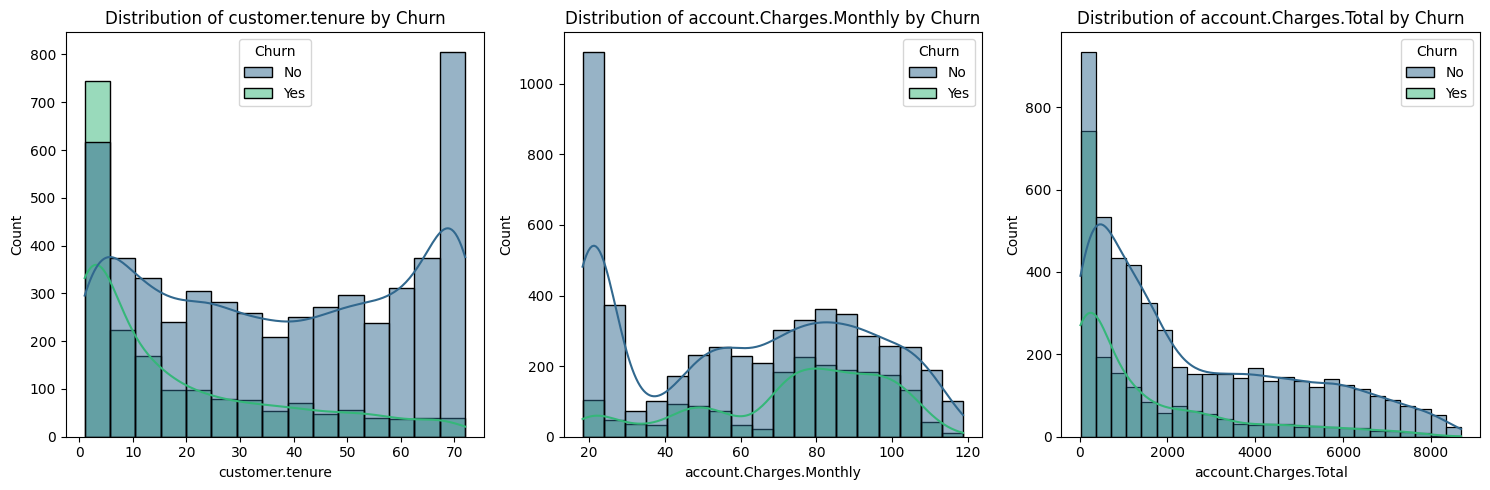


Generating Bar Plots for Categorical Columns by Churn Proportion...


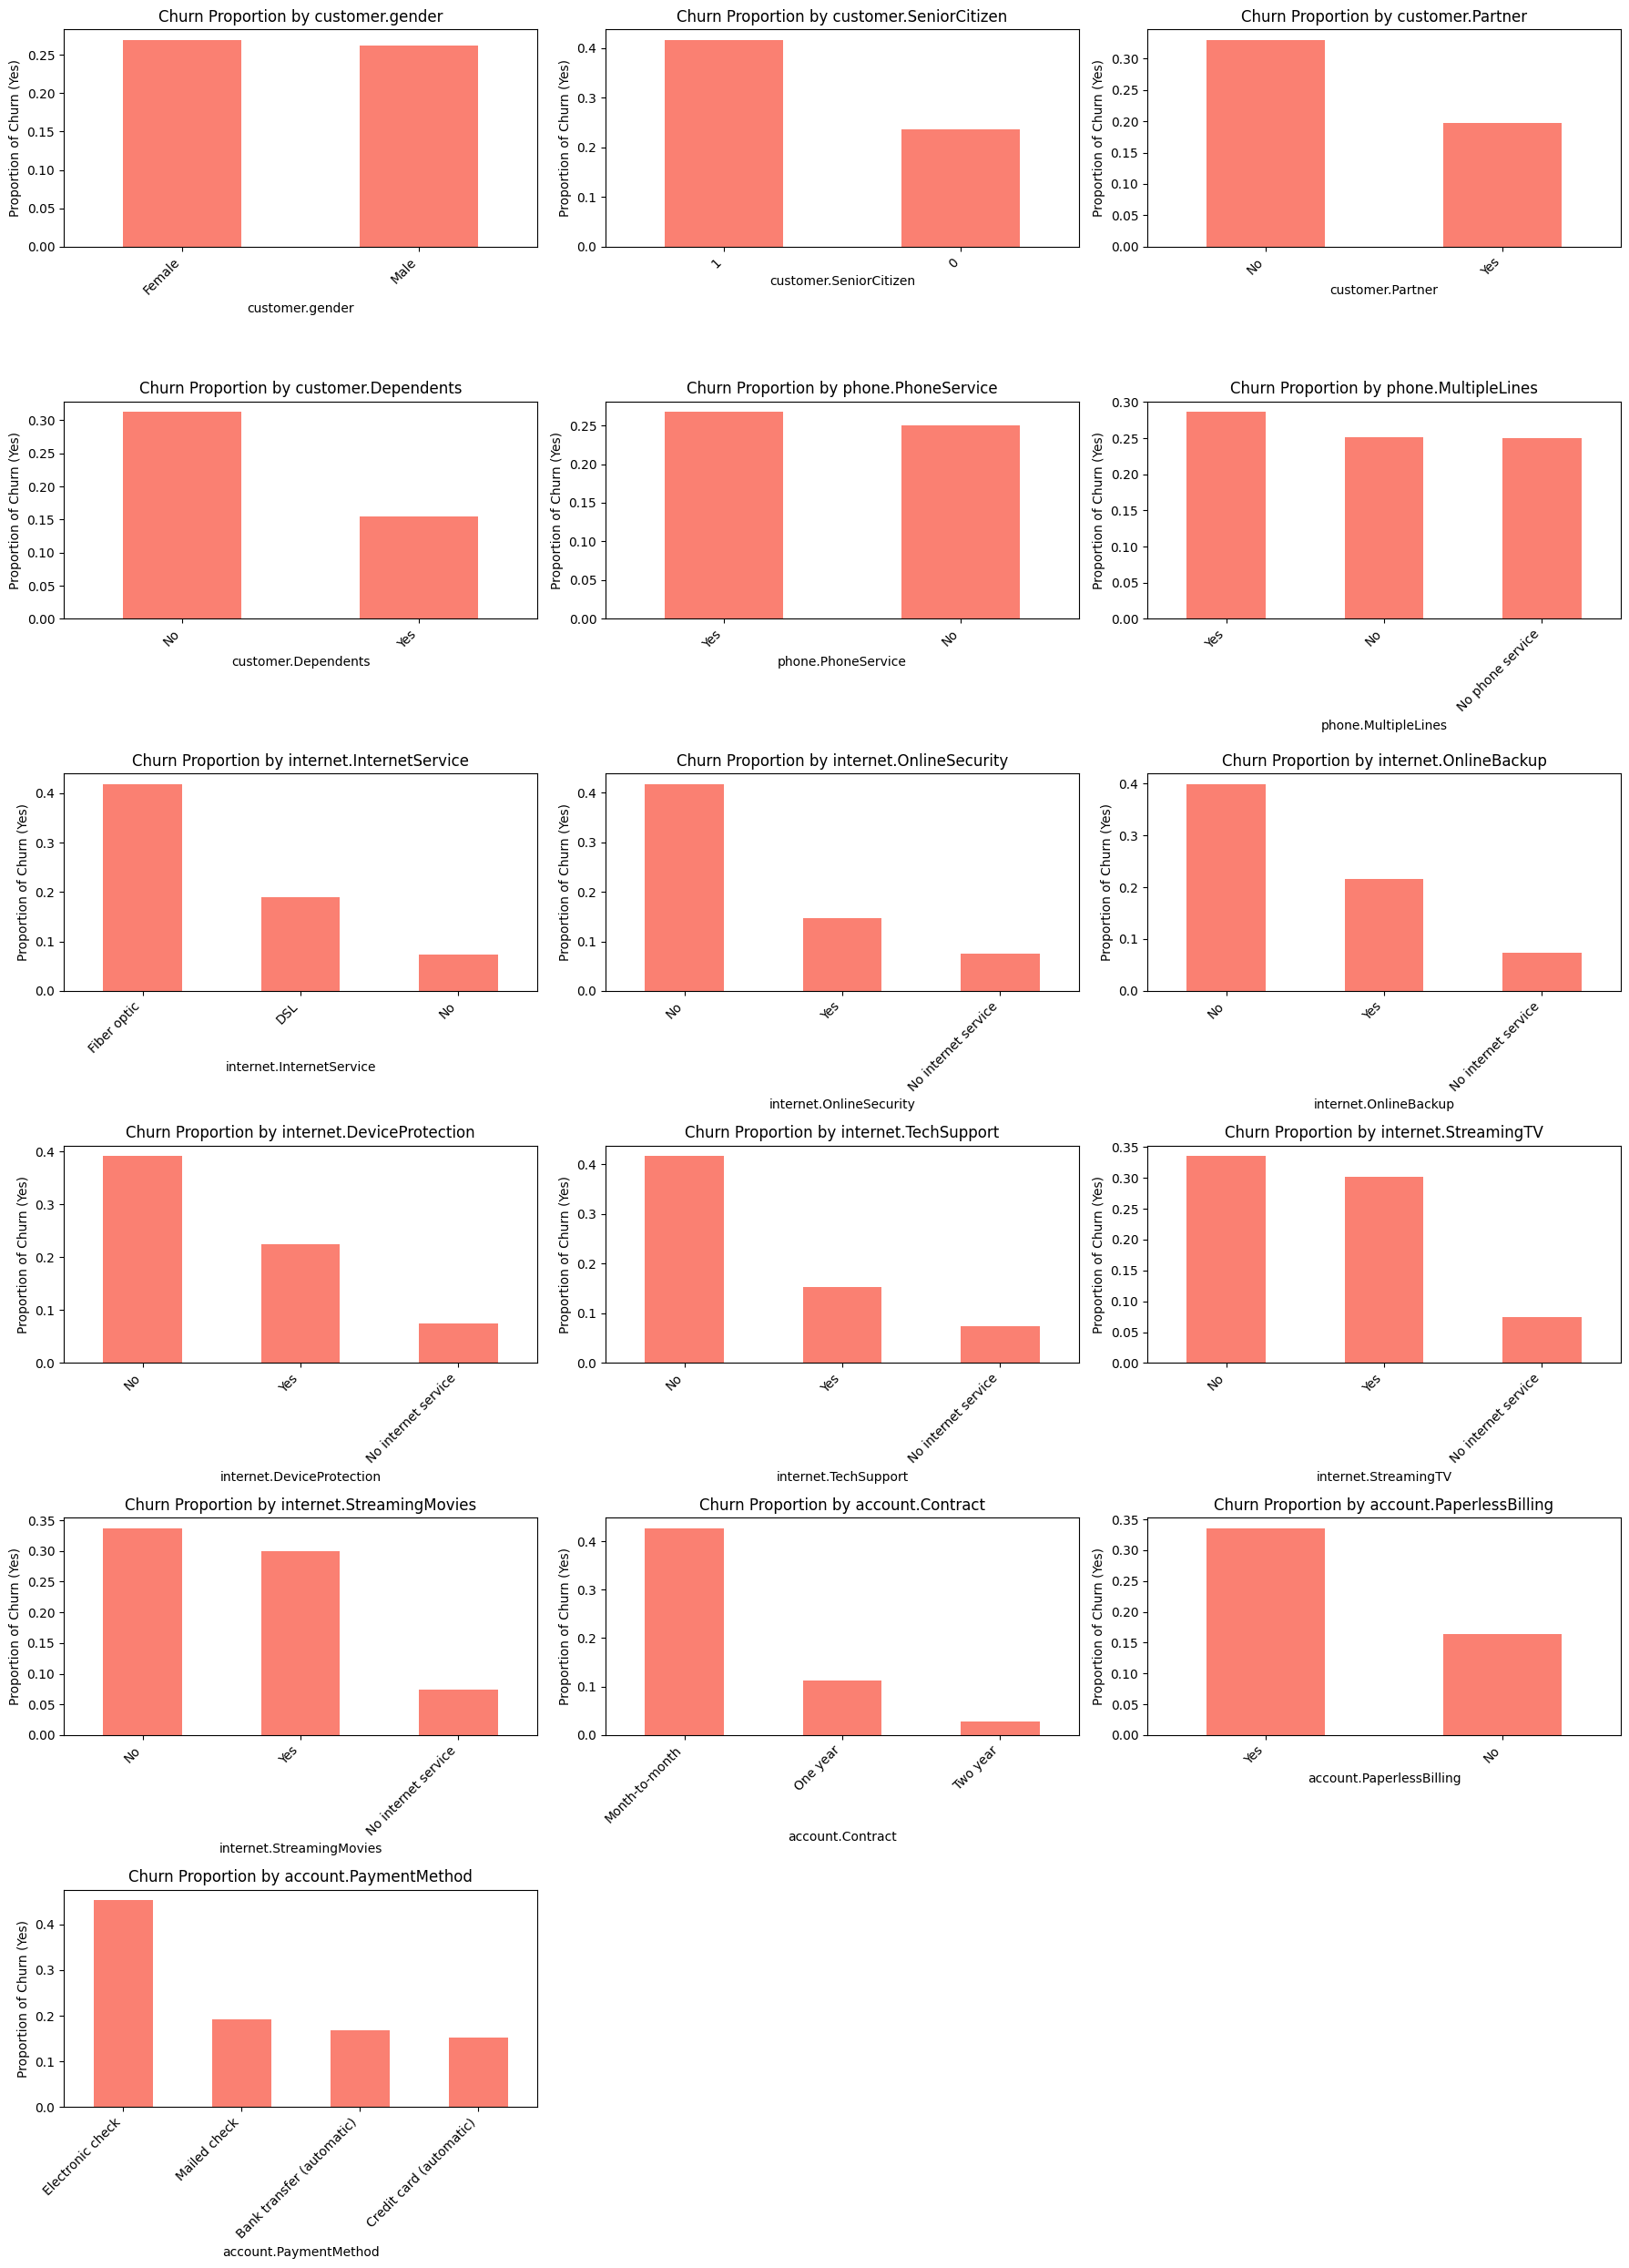


Generating Box Plots for Numerical Columns by Churn...


/tmp/ipython-input-2991951457.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='Churn', y=col, palette='viridis')
/tmp/ipython-input-2991951457.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='Churn', y=col, palette='viridis')
/tmp/ipython-input-2991951457.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='Churn', y=col, palette='viridis')


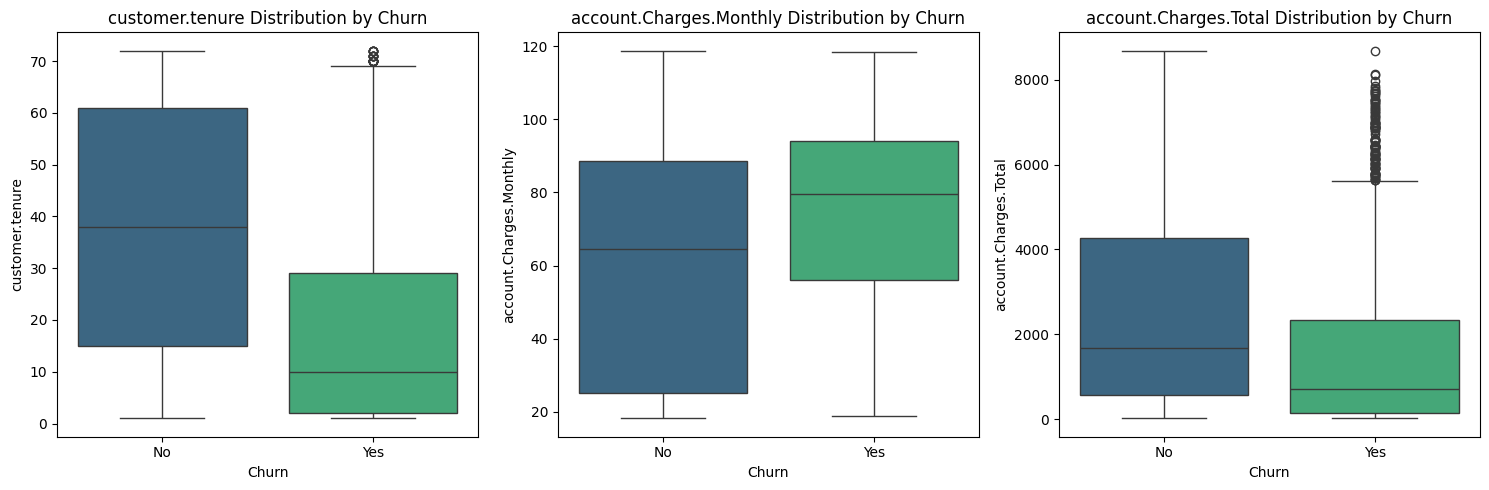


Generating Correlation Matrix Heatmap for Numerical Columns...


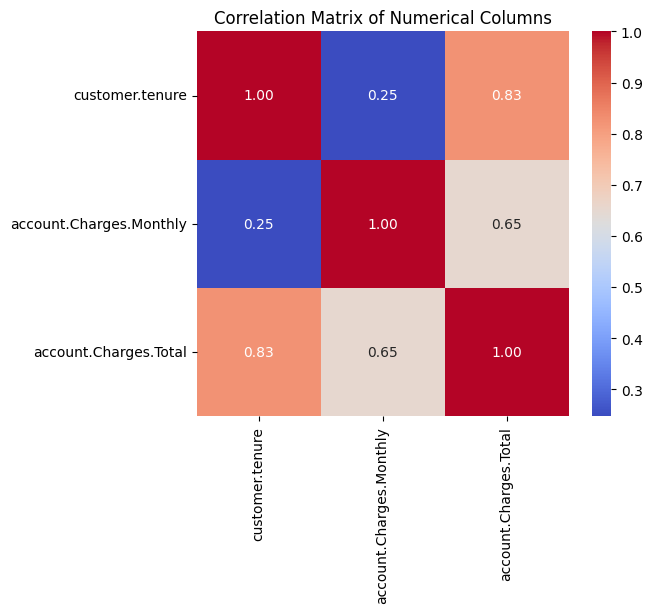

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']
categorical_cols = [col for col in df_normalizado.columns if col not in numerical_cols and col != 'customerID' and col != 'Churn']

# 1. Histograms for numerical columns separated by Churn
print("Generating Histograms for Numerical Columns by Churn...")
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data=df_normalizado, x=col, hue='Churn', kde=True, palette='viridis')
    plt.title(f'Distribution of {col} by Churn')
plt.tight_layout()
plt.show()

# 2. Bar plots for categorical columns showing churn proportion
print("\nGenerating Bar Plots for Categorical Columns by Churn Proportion...")
plt.figure(figsize=(18, 25))
for i, col in enumerate(categorical_cols):
    plt.subplot(6, 3, i + 1)
    churn_proportion = df_normalizado.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    churn_proportion['Yes'].sort_values(ascending=False).plot(kind='bar', color='salmon')
    plt.title(f'Churn Proportion by {col}')
    plt.ylabel('Proportion of Churn (Yes)')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Box plots for numerical columns separated by Churn
print("\nGenerating Box Plots for Numerical Columns by Churn...")
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df_normalizado, x='Churn', y=col, palette='viridis')
    plt.title(f'{col} Distribution by Churn')
plt.tight_layout()
plt.show()

# 4. Heatmap of correlation matrix for numerical columns
print("\nGenerating Correlation Matrix Heatmap for Numerical Columns...")
correlation_matrix = df_normalizado[numerical_cols].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

## Preparación de datos para modelado

### Subtarea:
Codificar variables categóricas y escalar variables numéricas si es necesario.


**Razonamiento**:
Identifique las columnas categóricas y numéricas, y luego aplique las técnicas de codificación y escalamiento adecuadas para preparar los datos para el modelado. La codificación One-Hot es adecuada para las variables categóricas nominales, y StandardScaler es adecuado para las variables numéricas.



In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numerical columns
numerical_cols = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']
categorical_cols = [col for col in df_normalizado.columns if df_normalizado[col].dtype == 'object' and col != 'customerID' and col != 'Churn']

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # Handle potential unknown categories

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Create a pipeline that first preprocesses the data and then could include a model
# For now, we just use the preprocessor to transform the data
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply the transformations to the DataFrame
df_processed = pipeline.fit_transform(df_normalizado.drop(['customerID', 'Churn'], axis=1))

# Convert the processed data back to a DataFrame (optional, but good for inspection)
# Get the feature names after one-hot encoding
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(cat_feature_names)

df_processed = pd.DataFrame(df_processed, columns=all_feature_names, index=df_normalizado.index)

print("Processed DataFrame head:")
display(df_processed.head())
print("\nProcessed DataFrame info:")
df_processed.info()

Processed DataFrame head:


,customer.tenure,account.Charges.Monthly,account.Charges.Total,customer.gender_Female,customer.gender_Male,customer.Partner_No,customer.Partner_Yes,customer.Dependents_No,customer.Dependents_Yes,phone.PhoneService_No,...,internet.StreamingMovies_Yes,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_No,account.PaperlessBilling_Yes,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,-0.954296,0.026652,-0.745607,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.954296,-0.162819,-0.768063,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.158016,0.302548,-0.883456,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.791321,1.103642,-0.461240,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.198760,0.634952,-0.889390,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0



Processed DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 44 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   customer.tenure                                  7032 non-null   float64
 1   account.Charges.Monthly                          7032 non-null   float64
 2   account.Charges.Total                            7032 non-null   float64
 3   customer.gender_Female                           7032 non-null   float64
 4   customer.gender_Male                             7032 non-null   float64
 5   customer.Partner_No                              7032 non-null   float64
 6   customer.Partner_Yes                             7032 non-null   float64
 7   customer.Dependents_No                           7032 non-null   float64
 8   customer.Dependents_Yes                          7032 non-null   float64
 9   phone.Ph

## Modelado

### Subtarea:
Construir y entrenar un modelo de clasificación para predecir la evasión.


**Razonamiento**:
Separar las características (X) y la variable objetivo (y), convertir el objetivo a numérico y dividir los datos en conjuntos de entrenamiento y prueba.



In [13]:
from sklearn.model_selection import train_test_split

# 1. Separate features (X) and target variable (y)
# Use df_processed for features as it contains the preprocessed data
X = df_processed
# Use Churn from df_normalizado and convert to numeric
y = df_normalizado['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Ensure the index of X and y are aligned
X = X.loc[y.index]

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5625, 44)
Shape of X_test: (1407, 44)
Shape of y_train: (5625,)
Shape of y_test: (1407,)


**Razonamiento**:
Importar y entrenar un modelo de clasificación utilizando los datos de entrenamiento.



In [14]:
from sklearn.linear_model import LogisticRegression

# 3. Import a suitable classification model (Logistic Regression as an example)
# 4. Instantiate the model
model = LogisticRegression(random_state=42)

# 5. Train the model using the training data
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

**Razonamiento**:
Realice predicciones sobre el conjunto de prueba utilizando el modelo entrenado.



In [15]:
# 6. Realizar predicciones sobre el conjunto de prueba (X_test)
y_pred = model.predict(X_test)

## Evaluación del modelo

### Subtask:
Evaluar el rendimiento del modelo utilizando métricas apropiadas.


**Razonamiento**:
Importe las métricas necesarias de sklearn.metrics y calcule las métricas de evaluación solicitadas (exactitud, precisión, recuperación, puntuación F1, matriz de confusión) utilizando los valores de prueba predichos y reales. A continuación, imprima los resultados.



In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.7953
Precision: 0.6433
Recall: 0.5160
F1-score: 0.5727

Confusion Matrix:
[[926 107]
 [181 193]]


#📄Informe final

### Subtask:
Presentar los hallazgos clave del análisis y las ideas para la prevención de la evasión.


**Reasoning**:
Summarize the key findings from the EDA, present the model evaluation metrics, and provide actionable recommendations based on the analysis.



In [17]:
# 1. Summarize Key Findings from EDA
print("## Key Findings from Exploratory Data Analysis (EDA)")
print("Based on the analysis of the dataset, several key characteristics were identified for customers more likely to churn:")
print("- **Tenure:** Churned customers generally have shorter tenures compared to non-churned customers, suggesting that newer customers are at a higher risk of churning.")
print("- **Monthly Charges:** Churned customers tend to have higher monthly charges, indicating that the cost of services might be a factor in their decision to leave.")
print("- **Total Charges:** Non-churned customers have higher total charges, which aligns with their longer tenures and suggests that long-term, loyal customers contribute more to revenue.")
print("- **Contract Type:** Customers with month-to-month contracts show a significantly higher churn rate compared to those with one-year or two-year contracts. This highlights the importance of longer-term commitments in retaining customers.")
print("- **Internet Service:** Customers with Fiber optic internet service have a higher churn rate than those with DSL or no internet service.")
print("- **Payment Method:** Electronic check as a payment method is associated with a higher churn rate.")
print("- **Additional Services:** Customers without online security, online backup, device protection, and tech support are more likely to churn. These services seem to contribute to customer stickiness.")
print("- **Senior Citizens:** Senior citizens appear to have a higher churn rate.")
print("-" * 50)

# 2. Present Model Evaluation Metrics
print("\n## Model Evaluation Metrics")
print("The Logistic Regression model was evaluated using common classification metrics on the test set:")
print(f"- **Accuracy:** {accuracy:.4f} - This represents the overall proportion of correct predictions (both churn and non-churn).")
print(f"- **Precision:** {precision:.4f} - This is the proportion of correctly predicted churn instances out of all instances predicted as churn. A higher precision indicates fewer false positives (predicting churn when the customer doesn't churn).")
print(f"- **Recall:** {recall:.4f} - This is the proportion of correctly predicted churn instances out of all actual churn instances. A higher recall indicates fewer false negatives (failing to predict churn for a customer who actually churns).")
print(f"- **F1-score:** {f1:.4f} - This is the harmonic mean of precision and recall, providing a balanced measure of the model's performance, especially when dealing with imbalanced datasets.")
print("\n**Confusion Matrix:**")
print(conf_matrix)
print("The confusion matrix shows:")
print(f"- True Negatives (Top-Left): {conf_matrix[0, 0]} (Correctly predicted non-churn)")
print(f"- False Positives (Top-Right): {conf_matrix[0, 1]} (Incorrectly predicted churn - Type I error)")
print(f"- False Negatives (Bottom-Left): {conf_matrix[1, 0]} (Incorrectly predicted non-churn - Type II error)")
print(f"- True Positives (Bottom-Right): {conf_matrix[1, 1]} (Correctly predicted churn)")

print("\n**Trade-offs between Precision and Recall:**")
print("In the context of churn prediction, both precision and recall are important. A high recall is desirable to identify as many potential churners as possible so that retention efforts can be targeted. However, a very high recall might come at the cost of lower precision, meaning more non-churning customers are incorrectly flagged as churners, leading to wasted resources on unnecessary retention campaigns. Conversely, high precision means fewer non-churners are targeted, but some actual churners might be missed (lower recall). The choice of which metric to prioritize depends on the business cost of false positives versus false negatives. In many churn scenarios, the cost of losing a customer (false negative) is higher than the cost of an unnecessary retention effort (false positive), suggesting that a balance with a focus on recall might be preferred, although the current model shows a lower recall compared to precision.")
print("-" * 50)

# 3. Actionable Insights and Recommendations
print("\n## Actionable Insights and Recommendations for Churn Prevention")
print("Based on the EDA findings and the model's performance, the following recommendations can be made to reduce customer churn:")
print("- **Target Newer Customers:** Implement early engagement programs and special offers for customers with low tenure to build loyalty from the start.")
print("- **Review Pricing and Service Value:** Analyze the service offerings and pricing, especially for customers with high monthly charges, to ensure perceived value aligns with the cost. Consider bundled packages or loyalty discounts.")
print("- **Promote Long-Term Contracts:** Encourage customers to switch from month-to-month to longer-term contracts (one-year or two-year) by offering incentives or discounted rates. The EDA clearly showed lower churn with longer contracts.")
print("- **Improve Fiber Optic Service:** Investigate potential issues or dissatisfaction among Fiber optic internet users, as they exhibit a higher churn rate. This could involve improving service reliability, speed consistency, or customer support specifically for this segment.")
print("- **Offer Incentives for Electronic Check Users:** Explore reasons behind the higher churn rate among electronic check users and consider offering alternative payment methods or incentives to switch to more stable options like automatic bank transfers or credit cards.")
print("- **Bundle Additional Services:** Promote and offer bundled packages that include online security, online backup, device protection, and tech support. The analysis suggests these services increase customer retention. Highlight the benefits and value of these add-ons.")
print("- **Develop Targeted Programs for Senior Citizens:** Create tailored service packages, support options, or communication strategies specifically for senior citizens to address their unique needs and reduce their churn risk.")
print("- **Improve Customer Support:** Given the importance of tech support in retaining customers, invest in improving the responsiveness and effectiveness of customer support channels.")
print("- **Utilize the Churn Model:** Deploy the trained model to identify customers at high risk of churning. Implement proactive outreach and personalized retention strategies for these identified individuals.")
print("-" * 50)

# 4. Conclusion
print("\n## Conclusion")
print("This analysis provided valuable insights into the characteristics of customers who are likely to churn and evaluated the performance of a Logistic Regression model in predicting churn. The EDA revealed that factors such as low tenure, high monthly charges, month-to-month contracts, Fiber optic internet, electronic check payments, lack of additional services, and being a senior citizen are associated with higher churn rates. The trained model achieved an accuracy of approximately 79.5%, with a precision of 64.3% and a recall of 51.6%. While the model's performance is reasonable, there is room for improvement, particularly in increasing the recall to better identify all potential churners.")
print("Implementing the recommended strategies, such as targeting at-risk customer segments, improving specific services, promoting longer contracts and additional services, and utilizing the churn prediction model for proactive interventions, can significantly help TelecomX in reducing customer churn and improving customer retention.")

## Key Findings from Exploratory Data Analysis (EDA)
Based on the analysis of the dataset, several key characteristics were identified for customers more likely to churn:
- **Tenure:** Churned customers generally have shorter tenures compared to non-churned customers, suggesting that newer customers are at a higher risk of churning.
- **Monthly Charges:** Churned customers tend to have higher monthly charges, indicating that the cost of services might be a factor in their decision to leave.
- **Total Charges:** Non-churned customers have higher total charges, which aligns with their longer tenures and suggests that long-term, loyal customers contribute more to revenue.
- **Contract Type:** Customers with month-to-month contracts show a significantly higher churn rate compared to those with one-year or two-year contracts. This highlights the importance of longer-term commitments in retaining customers.
- **Internet Service:** Customers with Fiber optic internet service have a higher chu

## Resumen:

### Hallazgos Clave del Análisis de Datos

* Los clientes con menor antigüedad tienen un mayor riesgo de abandono.
* Los clientes que abandonan el servicio tienden a tener cargos mensuales más altos, pero cargos totales más bajos en comparación con los clientes que no abandonan el servicio.
* Los clientes con contratos mensuales tienen una tasa de abandono significativamente mayor que aquellos con contratos a largo plazo.
* Los clientes que utilizan el servicio de internet de fibra óptica presentan una mayor tasa de abandono.
* El método de pago con cheque electrónico se asocia con una mayor tasa de abandono.
* Los clientes sin servicios adicionales como seguridad en línea, copias de seguridad en línea, protección de dispositivos y soporte técnico tienen mayor probabilidad de abandono.
* Las personas mayores parecen tener una mayor tasa de abandono.
* El modelo de regresión logística entrenado alcanzó una precisión de aproximadamente el 79,53 % en el conjunto de prueba.
* La precisión del modelo es del 64,33 %, lo que indica que aproximadamente el 64,33 % de los casos de abandono previstos son correctos. * La tasa de recuperación del modelo es del 51,60 %, lo que significa que identifica aproximadamente el 51,60 % de los casos reales de abandono.

### Perspectivas o próximos pasos

* Centrar los esfuerzos de retención en los clientes más nuevos (con menor antigüedad) y en aquellos con contratos mensuales.
* Investigar las razones de las mayores tasas de abandono de los usuarios de fibra óptica y de cheques electrónicos para implementar mejoras o alternativas específicas.


**La correlación entre diferentes variables del dataset**

*   La relación entre la cuenta diaria y la evasión.
*   Cómo la cantidad de servicios contratados afecta la probabilidad de churn.

Análisis adicional para la creación de modelos predictivos más robustos

Correlation Matrix with Churn:


,customer.tenure,account.Charges.Monthly,account.Charges.Total,Churn_numeric
customer.tenure,1.000000,0.246862,0.825880,-0.354049
account.Charges.Monthly,0.246862,1.000000,0.651065,0.192858
account.Charges.Total,0.825880,0.651065,1.000000,-0.199484
Churn_numeric,-0.354049,0.192858,-0.199484,1.000000


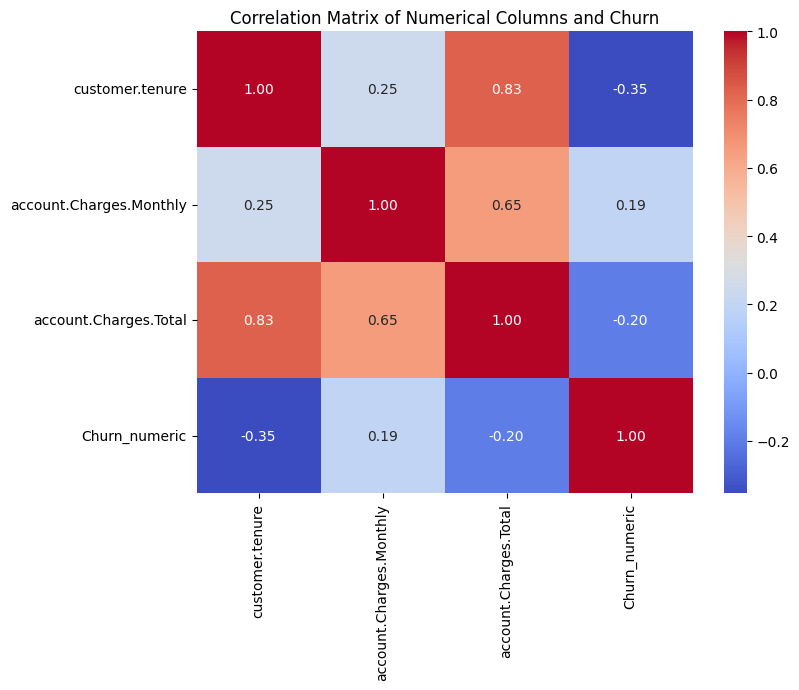

/tmp/ipython-input-3744510924.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='Churn', y='account.Charges.Monthly', palette='viridis')


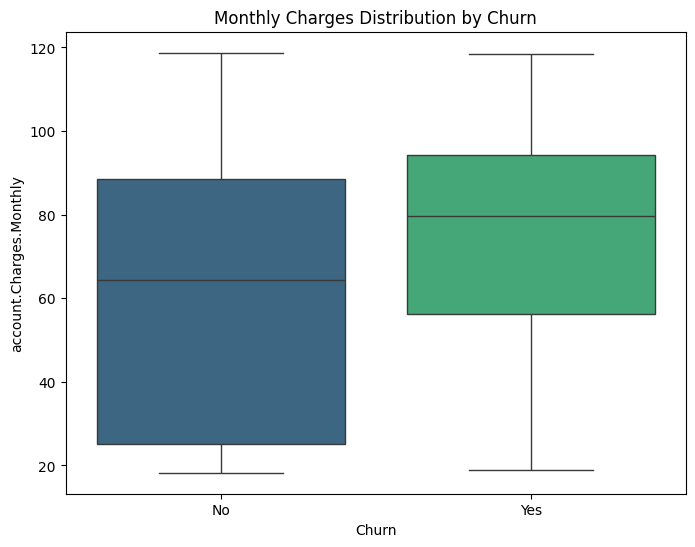

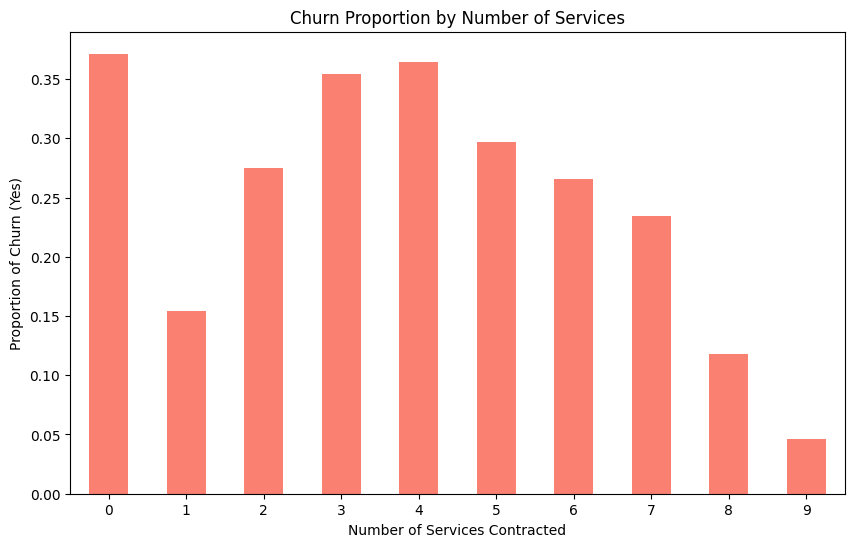

In [19]:
# Calculate correlation matrix for numerical columns including Churn (converted to numeric)
df_normalizado['Churn_numeric'] = df_normalizado['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
numerical_cols_with_churn = numerical_cols + ['Churn_numeric']
correlation_matrix_with_churn = df_normalizado[numerical_cols_with_churn].corr()

print("Correlation Matrix with Churn:")
display(correlation_matrix_with_churn)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_with_churn, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns and Churn')
plt.show()

# Explore the relationship between daily charges and churn (Monthly charges are a proxy for daily charges)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_normalizado, x='Churn', y='account.Charges.Monthly', palette='viridis')
plt.title('Monthly Charges Distribution by Churn')
plt.show()


# Explore how the number of services contracted affects churn
# We need to count the number of services for each customer.
# Assuming 'phone', 'internet', and 'account' nested dictionaries contain service information.
# We can count 'Yes' values within these dictionaries.

def count_services(row):
    service_count = 0
    # Check phone services (PhoneService and MultipleLines)
    if row['phone.PhoneService'] == 'Yes':
        service_count += 1
    if row['phone.MultipleLines'] == 'Yes':
        service_count += 1

    # Check internet services
    internet_services = ['internet.InternetService', 'internet.OnlineSecurity',
                         'internet.OnlineBackup', 'internet.DeviceProtection',
                         'internet.TechSupport', 'internet.StreamingTV',
                         'internet.StreamingMovies']
    for service in internet_services:
        if row[service] == 'Yes':
            service_count += 1

    # Check account services (PaperlessBilling might be considered a service)
    if row['account.PaperlessBilling'] == 'Yes':
         service_count += 1

    return service_count

df_normalizado['num_services'] = df_normalizado.apply(count_services, axis=1)

# Visualize churn proportion by number of services
plt.figure(figsize=(10, 6))
churn_proportion_by_services = df_normalizado.groupby('num_services')['Churn_numeric'].value_counts(normalize=True).unstack().fillna(0)
churn_proportion_by_services[1].plot(kind='bar', color='salmon') # Plotting churn = Yes proportion
plt.title('Churn Proportion by Number of Services')
plt.xlabel('Number of Services Contracted')
plt.ylabel('Proportion of Churn (Yes)')
plt.xticks(rotation=0)
plt.show()

# Drop the temporary 'Churn_numeric' column
df_normalizado = df_normalizado.drop('Churn_numeric', axis=1)

In [20]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=correlation_matrix_with_churn)

https://docs.google.com/spreadsheets/d/16xB6St3-bBUihuy6VMMr3KJcAFp0FzJo3AMUzB5bETo/edit#gid=0
